<a href="https://colab.research.google.com/github/RafaelSapia/projetos_data_science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*
___
# Analisando a Violência no Rio de Janeiro

Temos registros de violência de vários tipos todos os dias por todos os cantos do Brasil. Infelizmente essa ainda é uma realidade recorrente para o país.

Analisar tais dados se faz de extrema importância, pois em cima dos resultados e insights que tiramos, podemos otimizar o processo de redução da violência e encontrar novos metodos cada vez mais eficazes para acabar com ela. Olhar para o passado para tentar prever, ou basear as decisões do futuro é sempre recomendado...

O governo do Rio de Janeiro tem a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/). Nesse *notebook* faremos uma análise de alguns indicadores estatíticos sobre a violência no estado do Rio de Janeiro.

## Obtenção dos Dados

Os dados utilizados nesta análise foram obtitos atravéz do portal ISPDados, uma plataforma de Dados Abertos fornecido pelo Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas digulvadas nesta plataforma são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM).

Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

O arquivo utilizado nessa análise possui extensão ```csv``` e pode ser baixado por meio deste [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv). Vamos a análise.



### Importando o pacote e os dados

Inicalmente importatemos o pacote que será usado nesta análise, assim como os dados, que ficarão em um *Data Frame* que chamaremos de ```df```.

In [32]:
# importando os pacotes necessarios
import pandas as pd
import numpy as np

# importando os dados

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

No início de qualquer análise é necessário de conhecer o conjunto de dados que estamos trabalhando. Conhecer quais variáveis temos, qual a quantidade dessas, valores faltantes e qual o tipo delas. 

Este processo auxília demais durante todo o desenvolvimento dos insights, pois é com esse processo que nos familizarizamos com o nosso *dataset*.



###Número de linhas e colunas

Iniciaremos observando o tamanho do nosso conjunto de dados por meio do método ```shape```.

Observamos que temos um conjunto de dado relativamente pequeno em relação à quantidade de entradas, pórem para cada uma delas temos uma boa quantidade de informação visto que temos 56 variáveis.

In [ ]:
# verificando numero de linhas e colunas do df

print("Número de entradas: {}".format(df.shape[0]))
print("Número de variáveis: {}".format(df.shape[1]))

Número de entradas: 344
Número de variáveis: 56


###Nome das colunas

Seguindo com a exploração do *dataset*, veremos agora quais os nomes das colunas, ou seja, o nome de cada variável presente. É importante deixa-las logo no início da análise para se caso precisarmos rever algum nome, teremos aqui.

Observamos que apesar da abreviação dos nomes, é possível identificar oque cada variável significa.

In [ ]:
# nome das variáveis

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

###Tipo das variáveis

Agora, verificaremos os tipos de cada variável.

Para análises futuras presisamos garantir que cada variável está com o tipo correto para podermos tralhar com ela.

Vemos que todas as variáveis estão ou no tipo ```int```(inteiro) ou ```float```(contínuo), portanto todas estão com o tipo correto para trabalharmos.

In [ ]:
# tipo das variáveis

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

###Vendo algumas entradas

Vamos agora ter uma ideia de como está a "cara" do nosso conjunto de dados.

Logo de início podemos notar que provavelmente existe uma quantidade considerável de valores ausentes e que provavelmente esses valores estão concentrados no início do conjunto de dados, onde estão os dados mais antigos. Vemos também que o período do conjunto de dados vai de janeiro de 1991 a agosto de 2019.

Note que a organização do conjunto de dados é em relação à quantidade de determinado crime cometido por mês de um derterminado ano.

In [ ]:
# cinco primeiras entradas do df


df.head(5)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# vendo periodo do df

df.vano.value_counts()

2005    12
2004    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
1991    12
2018    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2019     8
Name: vano, dtype: int64

###Valores ausentes

Como observado acima, provavelmente temos uma parcela considerável de valores ausentes. Vamos verificar isso em termos de porcentagem.

É sempre importante quantificar a ausência de valores para não cometer o erro de escolher uma variável para analisar que não tenha valores suficientes para gerar resultados representativos.

Podemos observar neste caso que existem variáveis que possuim poucos dados, como é o caso das variáveis ```roubo_bicicleta``` e ```furto_bicicleta```. Além disso vemos que uma quantidade significativa de variáveis possuem alguma porcentagem de valores ausentes.

In [ ]:
# fazendo porcentagem de valores ausentes e colocando em ordem decrescente

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

## Informações Estatísticas da Violência no Rio de Janeiro

Iniaremos agora a parte de análise estatística sobre o conjunto de dados. Insights importantes podem ser gerados nesse momento, além de nos dar maior conhecimento sobre o conjunto de dados que ajudaria muito no momento de criação de um modelo preditivo, por exemplo.

Nesta análise teremos três pontos principais: 

  * Uma tabela com medidas estatísticas básicas
  * Taxa de carros recuperados 
  * Investigação de características dos dados de Homicídio Doloso


###Resumo estatístico

Inicaremos a análise estatística observando algumas medidas de tendência central e algumas medidas de dispersão em relação a cada uma das variaveis do nosso *dataset*. Para isso sera utilizado a função ```describe```.

É importante vermos este resumo para termos uma ideia de como os dados estão distribuidos. Em alguns casos (este não está incluso) esta análise é interessante para observar a possivel existência de outlier em alguma variável, além de vários outros insights que são particulares para cada conjunto de dados.

Vemos que em para boa parte dos tipos de crime temos uma grande variação ao longo do período do *dataset* (1991-2019). Vemos tambem que para alguns crimes como por exemplo ```roubo_veiculo``` e ```roubo_transeunte``` possuem máximas muito altas. Observando as médias de roubo e as médias de furto, vemos que mais furtos ocorreram. 

Configura-se furto quanto o ladrão toma algo de uma pessoa sem ter nenhum tipo de contato. Temos roubo quando é feito contato, violência ou ameaça contra a vítima.

In [ ]:
# resumo estatistico do df

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

###Porcentagem de carros recuperados

Para ter um breve paranorama da eficiência na recuperação de carros, podemos observar a porcentagem **média** destes em relação à quantidade de carros furtados e roubados. Vamos ver tambem como se deu a evolução dessa **média** ao longo do tempo.

Podemos observar que praticamente 43% dos carros furtados ou roubados são recuperados. Note que este valor é a porcetagem média de carroa recuperados em todo o período do *dataset*. Observe o gráfico que mostra como se deu a variação dessa média ao longo do tempo.

Podemos ver que a média nos períodos iniciais do *dataset* era bem menor do que a que temos atualmente. Esta que temos atualmente é um pouco maior do que a média geral, algo em torno de 45%.

In [ ]:
# pegando a media de carros recuperados, roubados e furtados

car_recup = df.recuperacao_veiculos.mean()
car_furto = df.furto_veiculos.mean()
car_roubo = df.roubo_veiculo.mean()

print("Quantidade média de carros recuperados: {:.2f}"
      .format(car_recup))
print("Quantidade média de carros roubados: {:.2f}"
      .format(car_roubo))
print("Quantidade média de carros furtados: {:.2f}\n"
      .format(car_furto))

# fazendo porcentagem de carros recuperados

porcent = car_recup / (car_roubo + car_furto) * 100
print("Porcentagem de carros recuperados: {:.2f}%".format(porcent))


Quantidade média de carros recuperados: 1772.24
Quantidade média de carros roubados: 2448.70
Quantidade média de carros furtados: 1674.67

Porcentagem de carros recuperados: 42.98%


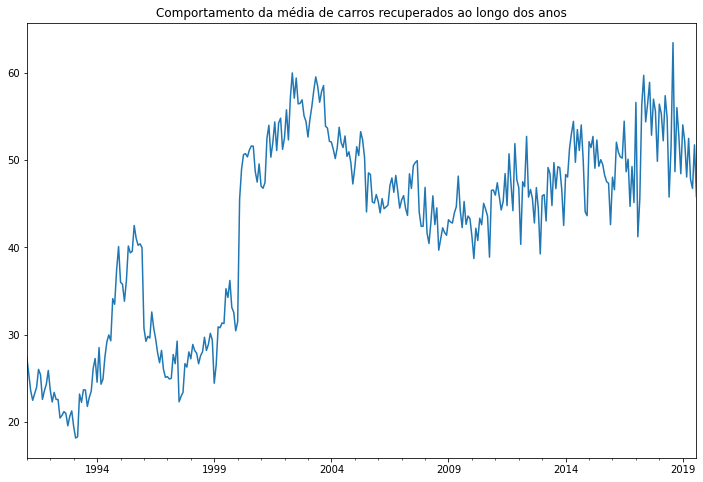

In [53]:
# fazendo o grafico da média de recuperação dos carros

media_carrecup= (df.recuperacao_veiculos / (df.roubo_veiculo + df.furto_veiculos)) * 100
media_carrecup.index = pd.date_range('1/1991', periods=344, freq= 'M')
media_carrecup.plot(figsize=(12, 8), 
                    title='Comportamento da média de carros recuperados ao longo dos anos');

###Breve análise de Homicídio Doloso

O homicídio doloso é o crime no qual uma pessoa mata outra consciente deste ato.

Veremos aqui a o número máximo e mínimo de homicídio doloso durante o período do *dataset*. Utilizaremos, portanto a variável ```hom_doloso```e as funções ```max``` e ```min```.

Vemos uma diferença considerável entre a máxima e a minima. Lembrando que são valores mensais, portanto tais valores ocorreram durante o período de um ou mais meses dentro do período do conjunto de dados.

Verificaremos em seguida quais meses de quais anos ocorreram a máxima e a minima.

In [ ]:
# maximo de hom_doloso

print("Máximo de Homicídio Doloso: {}".format(df.hom_doloso.max()))

# minimo de hom_doloso

print("Mínimo de Homicídio Doloso: {}".format(df.hom_doloso.min()))

Máximo de Homicídio Doloso: 831
Mínimo de Homicídio Doloso: 272


Faremos agora e verificação de data desse numero máximo e mínimo de homicídio doloso.

Vemos que a data do periodo que teve-se maior quantidade de homicídios dolosos foi janeiro de 1995. A data do periodo quando tivemos a menos quantidade de homicídios dolosos foi junho de 2015.

De um modo geral, somente observando a informação abaixo podemos dizer que a taxa de homicídio doloso caiu de 1995 a 2015. É provavel que anterior a 1995 a quantidade desse tipo de crime era menor, assim como após 2015 podemos dizer que provavelmente subiu a quantidade.

Para verificar essas informações com maior exatidão, plotaremos um gráfico.

In [55]:
# verificando data com maximo de homicidio doloso

df[df['hom_doloso'] == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [56]:
# verificando data com minimo de homicidio doloso

df[df['hom_doloso'] == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


## Visualização de Dados

Visualizar dados é algo essencial durante a análise exploratória. Nós entendemos uma ideia muito mais facilmente por meio de um gráfico do que por uma tabela, portanto a chance de insights cada vez melhores são maiores observando gráficos. Observe o gráfico mostrado acima sobre como se deu a porcentagem média de recuperação de carros, é muito simples de entender como variou tal média.

Os seguintes gráficos serão plotados adiante:
* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


###Histograma de Homicídio Doloso

Como dito ali em cima, precisamos observar um gráfico para tirar conclusões um pouco mais precisas sobre o Homicídio Doloso. Por isso será plotado agora, a partir da variável `hom_doloso` um histograma.

Vemos a partir do histograma abaixo que durante todo o período do conjunto de dados a quantidade de Homicídio Doloso variou de aproximadamente 270 a 840 por mês, sendo que a maioria dos meses foi uma quantidade entre 300 e 600.

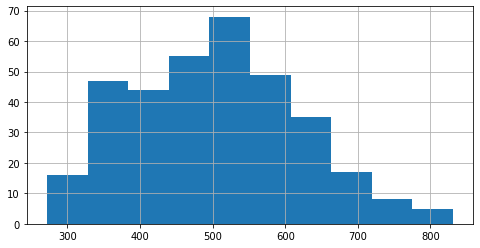

In [58]:
# plotando histograma pra hom_doloso

df.hom_doloso.hist(figsize=(8,4));

###Gráfico Temporal de Homicídio Doloso

Para respondermos com maior precisão a hipótese levantada durante a análise feita dos dados do homicídio doloso precisamos observar um gráfico da quantidade de homicídio doloso em relação ao tempo. Para isso mudaremos o índice do conjunto de dados para o ano referente a cada entrada e usaremos a função `plot` logo em seguida para gerar o grafico de linhas.


Vemos que a hipótese está certa, podemos observar que com o tempo, a quantidade de homicídios doloso no estado do Rio de Janeiro caiu.

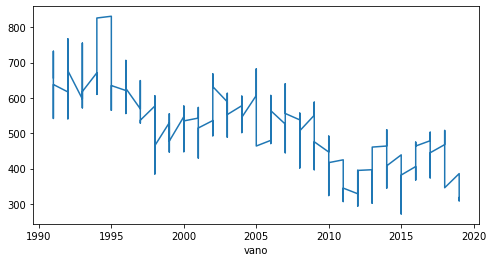

In [57]:
# mudando indice do df

df_copy = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv", index_col='vano')

# plotando o grafico temporal

df_copy.hom_doloso.plot(figsize=(8,4));

###Gráfico de Linhas para Roubo em Coletivo

Faremos agora um outro gráfico de linhas, porém para a variável `roubo_em_coletivo`. Vale lembrar que esse gráfico será feito em relação ao índice de cada mês do conjunto de dados, e esses indices seguem a sequência dos anos, ou seja, os menores índices representam os anos mais antigos, e os indíces maiores, os anos mais atuais.

Podemos observar um comportamento interessante desse gráfico. Vemos uma nitida ascenção desse tipo de roubo com o tempo até aproximadamente o ano de 2017. Neste ano, como podemos observar logo abaixo do gráfico, nos dois primeiros meses de tivemos uma queda brusca e logo após a recuperação e normalização da tendência.

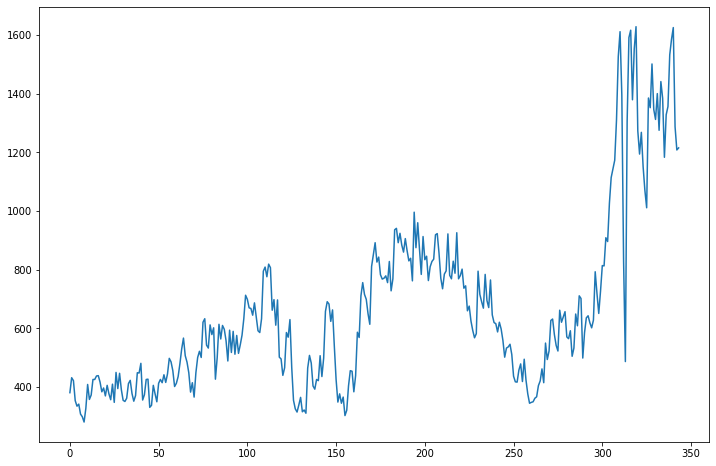

In [59]:
# plotando o grafico

df.roubo_em_coletivo.plot(figsize=(12,8));

In [ ]:
# vendo roubo coletivo em 2017


df[df.vano == 2017].roubo_em_coletivo

312     828
313     487
314    1306
315    1591
316    1616
317    1379
318    1552
319    1628
320    1273
321    1194
322    1268
323    1151
Name: roubo_em_coletivo, dtype: int64

## Conclusão

Neste notebook foi feita uma breve análise sobre a violência no estado do Rio de Janeiro.

Fazendo esta análise exploratória podemos perceber alguns pontos interessantes como, por exemplo, o fato de alguns tipos de crime vir diminuindo sua incidência no estado como é o caso do homicídio doloso, encontra partida de outros tipos que vem aumentando sua incidência como é o caso do roubo em coletivo.

Além disso, observando o gráfico desse último notamos uma peculiaridade que é uma queda brusca em meio a ascenção do número de incidências. Os motivos para isso podem ser variados, motivos políticos, econômicos ou até mesmo um erro de coleta de dados.

Outro ponto observado foi a taxa média de recuperação de veículos em todo o período analisado (1991-2015), sendo ela próxima de 50%. Podemos considerar uma boa taxa de recuperação considerando a dificuldade deste trabalho.

Por fim, gostaria de agradecer caso você tenha chegado aqui e lembrar que esta é uma breve análise, o intuito não é mostrar grandes explicações para os problemas citados, muito menos criticar qualquer instância do orgão público. O intuito aqui é simplesmente mostrar a riqueza de informações que uma simples análise com poucas linhas de código pode trazer. Imagine uma análise completa...